In [12]:
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.getOrCreate()
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize

# Read crime and safe files

In [123]:
crime_path = './dataset/crime_locations.csv'
safe_path = './dataset/safe_locations.csv'

x_cols =["windows","car",'lights','gas','convenience','sdpd','lampdist'] #Columns which are X

# x_cols =["car",'lights','gas','convenience','sdpd','lampdist'] #Columns which are X

# x_cols =["car",'gas','convenience','sdpd','lampdist'] #Columns which are X

y_cols =["crime"] #A column which is Y

crime_df = pd.read_csv(crime_path,usecols =x_cols + y_cols) # usecols =crime_cols
safe_df = pd.read_csv(safe_path,usecols =x_cols + y_cols) # usecols =crime_cols

In [126]:
all_df = crime_df.append(safe_df).reset_index(drop=True);

x_train, x_test, y_train, y_test = train_test_split(all_df[x_cols], all_df[y_cols], test_size=0.2,random_state=34)
# x_train, x_test, y_train, y_test = train_test_split(all_df[x_cols], all_df[y_cols], test_size=0.2)

In [140]:
# Combine safe and crime, and then using train_test_split separates train&test 
all_df

,windows,car,lights,gas,convenience,sdpd,lampdist,crime
0,0,6,0,736,468,2421,120.000000,ROBBERY
1,0,3,2,203,258,1289,31.620000,ROBBERY
2,0,5,4,352,362,309,14.140000,ROBBERY
3,0,5,4,899,899,1329,22.360000,ROBBERY
4,0,5,5,330,383,202,14.140000,ROBBERY
5,8,3,23,291,390,1422,10.000000,ROBBERY
6,2,2,3,735,815,669,10.000000,ROBBERY
7,0,7,1,1244,1244,797,22.360000,ROBBERY
8,0,2,0,2295,104,852,41.230000,ROBBERY
9,0,6,3,1104,1421,1278,22.360000,ROBBERY


# K nearest neighbor (KNeighborsClassibfier)

In [130]:
for k_value in range(2,20,2):
#     print(k_value)
    neigh = KNeighborsClassifier(n_neighbors=k_value)
    neigh.fit(x_train, y_train.crime)

    knn_y_predict = neigh.predict(x_test)
    knn_y_predict

    print("K value: ", k_value, "   Accuracy: ", accuracy_score(y_test, knn_y_predict))

K value:  2    Accuracy:  0.6504065040650406
K value:  4    Accuracy:  0.6869918699186992
K value:  6    Accuracy:  0.6829268292682927
K value:  8    Accuracy:  0.6666666666666666
K value:  10    Accuracy:  0.6504065040650406
K value:  12    Accuracy:  0.6544715447154471
K value:  14    Accuracy:  0.6463414634146342
K value:  16    Accuracy:  0.6138211382113821
K value:  18    Accuracy:  0.6056910569105691


In [129]:
for k_value in range(2,20,2):
#     print(k_value)
    neigh = KNeighborsClassifier(n_neighbors=k_value)
    neigh.fit(n_x_train, n_y_train.crime)

    knn_y_predict = neigh.predict(n_x_test)
    knn_y_predict

    print("K value: ", k_value, "   Accuracy: ", accuracy_score(n_y_test, knn_y_predict))

K value:  2    Accuracy:  0.6585365853658537
K value:  4    Accuracy:  0.6747967479674797
K value:  6    Accuracy:  0.6951219512195121
K value:  8    Accuracy:  0.6666666666666666
K value:  10    Accuracy:  0.7113821138211383
K value:  12    Accuracy:  0.6991869918699187
K value:  14    Accuracy:  0.6910569105691057
K value:  16    Accuracy:  0.6951219512195121
K value:  18    Accuracy:  0.6910569105691057


In [157]:
now_x_cols = ["car",'lights','gas','convenience','sdpd','lampdist']
now_x_train, now_x_test, now_y_train, now_y_test = train_test_split(n_all_df[now_x_cols], all_df[y_cols], test_size=0.2,random_state=34)
             
for k_value in range(2,20,2):
    neigh = KNeighborsClassifier(n_neighbors=k_value)
    neigh.fit(now_x_train, now_y_train.crime)

    now_y_predict = neigh.predict(now_x_test)
    now_y_predict

    print("K value: ", k_value, "   Accuracy: ", accuracy_score(now_y_test, now_y_predict))      
             
             

K value:  2    Accuracy:  0.6626016260162602
K value:  4    Accuracy:  0.6910569105691057
K value:  6    Accuracy:  0.7032520325203252
K value:  8    Accuracy:  0.6747967479674797
K value:  10    Accuracy:  0.7073170731707317
K value:  12    Accuracy:  0.6991869918699187
K value:  14    Accuracy:  0.6951219512195121
K value:  16    Accuracy:  0.6869918699186992
K value:  18    Accuracy:  0.7032520325203252


# AdaBoost : AdaBoostClassifier

In [145]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),algorithm="SAMME",n_estimators=200)

bdt.fit(x_train, y_train.crime)

bdt_y_predict = bdt.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, bdt_y_predict))

Accuracy:  0.8089430894308943


In [149]:
# n_all_df = all_df.copy()

# for a_col in ['gas','convenience','sdpd','lampdist']:
#     temp = normalize(n_all_df[[a_col]].transpose())
# #     print(temp.transpose())
#     n_all_df[a_col] = temp.transpose()
    
# n_all_df 
    
# all_df   


# n_x_train, n_x_test, n_y_train, n_y_test = train_test_split(n_all_df[x_cols], n_all_df[y_cols], test_size=0.2,random_state=34)

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),algorithm="SAMME",n_estimators=200)

bdt.fit(n_x_train, n_y_train.crime)

bdt_y_predict = bdt.predict(n_x_test)

print("Accuracy: ", accuracy_score(n_y_test, bdt_y_predict))

Accuracy:  0.7926829268292683


# Cross Validation

In [139]:
# kneigh = KNeighborsClassifier(n_neighbors=5)

# scores = cross_val_score(kneigh, all_df[x_cols], all_df[y_cols].crime, cv=5, scoring='f1_macro')
# print("The mean score of KNN: ",scores.mean())


# bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),algorithm="SAMME",n_estimators=200)
bdt = KNeighborsClassifier(n_neighbors=10)



scores = cross_val_score(bdt, all_df[x_cols], all_df[y_cols].crime, cv=5, scoring='f1_macro')
print("The mean score of AdaBoost: ",scores.mean())
print(scores)

print("==============================================")
print("Normalization")


scores = cross_val_score(bdt, n_all_df[x_cols], n_all_df[y_cols].crime, cv=5, scoring='f1_macro')
print("The mean score of AdaBoost: ",scores.mean())
print(scores)

The mean score of AdaBoost:  0.5488376004469292
[0.56680515 0.45842105 0.59703947 0.6        0.52192233]
Normalization
The mean score of AdaBoost:  0.6857708944815784
[0.65525526 0.66516667 0.72236786 0.70989476 0.67616992]


In [138]:
# # data = [[0, 0], [0, 0], [1, 1], [1, 1]]
# scaler = StandardScaler()
# print(scaler.fit(all_df[x_cols]))
# # print(scaler.mean_)
# print(scaler.transform(all_df[x_cols]))

# print("==============================================")

# # scaler = StandardScaler()
# # scaler.fit(all_df[x_cols])
# # print(scaler.scale_)

array([[0.01023232, 0.00564089, 0.00791474, ..., 0.03616293, 0.0300629 ,
        0.01263735]])

# Visualization

Text(0.5, 1.0, 'lampdist')

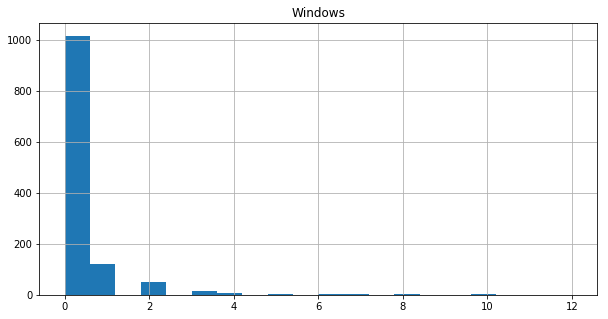

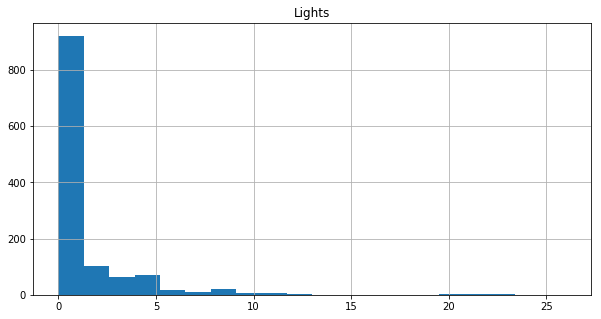

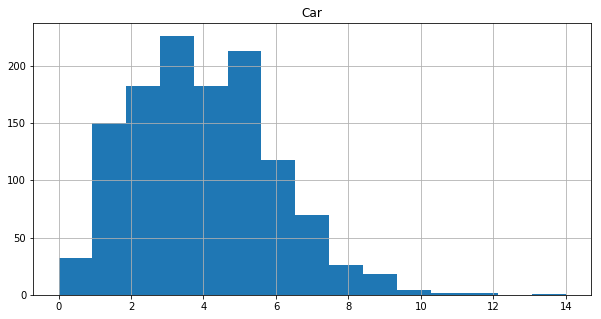

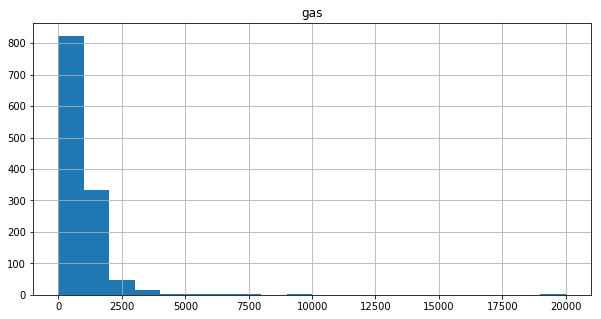

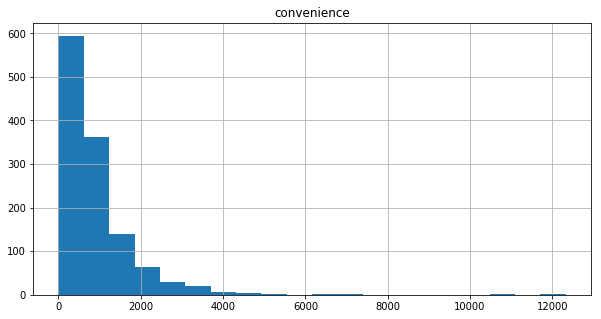

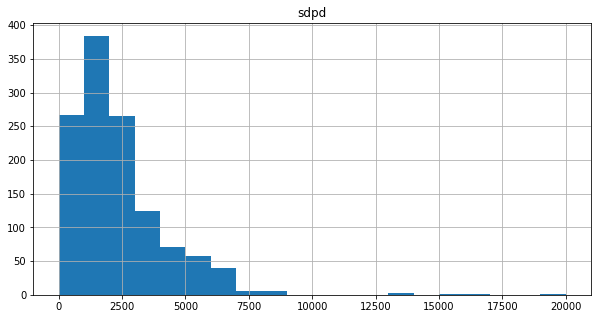

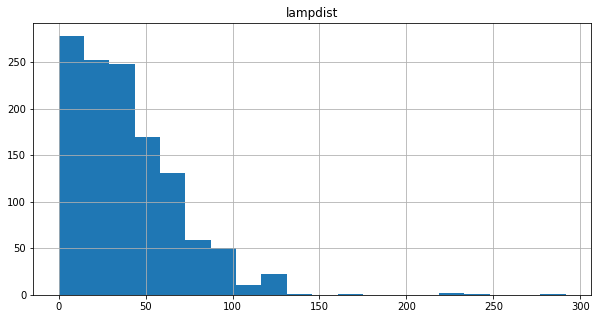

In [152]:
plt.figure(figsize=[10,5])
ax = all_df.windows.hist(bins= 20)
ax.set_title("Windows") 
# ax.set_ylim([0, 20]) 
# _ = plt.xticks(range(11)) 


plt.figure(figsize=[10,5])
all_df.lights.hist(bins= 20).set_title("Lights")
# _ = plt.xticks(range(11)) 

plt.figure(figsize=[10,5])
all_df.car.hist(bins= 15).set_title("Car")
# _ = plt.xticks(range(16)) 

plt.figure(figsize=[10,5])
all_df.gas.hist(bins= 20).set_title("gas")
# _ = plt.xticks(range(16)) 


plt.figure(figsize=[10,5])
all_df.convenience.hist(bins= 20).set_title("convenience")
# _ = plt.xticks(range(16)) 


plt.figure(figsize=[10,5])
all_df.sdpd.hist(bins= 20).set_title("sdpd")
# _ = plt.xticks(range(16)) 


plt.figure(figsize=[10,5])
all_df.lampdist.hist(bins= 20).set_title("lampdist")
# _ = plt.xticks(range(16)) 

In [ ]:
# plt.figure(figsize=(20,6)) 
# ax = sns.boxplot(data= all_df[x_cols], orient='v')

# ax = sns.boxplot(data= all_df.lights, orient='v')
# ax = sns.boxplot(data= all_df.car, orient='v')
# ax = sns.boxplot(data= all_df.windows, orient='v')
# ax = sns.boxplot(data= all_df, orient='v')

# ax = sns.barplot(data= all_df.car, orient='v')

# ax = sns.barplot(data= all_df, orient='v')


# ax.set_ylim([30, 200]) 
# ax.set_title("Male")

# PCA! Principle component analysis

In [ ]:
pca = decomposition.PCA(n_components=4)
principalComponents = pca.fit_transform(all_df[x_cols])
principal_Df = pd.DataFrame(data = principalComponents)
# principal_Df
# pca_x_train, pca_x_test, pca_y_train, pca_y_test = sklearn.model_selection.train_test_split(principalDf, all_movies_df["Genre"], test_size=0.2,random_state=34)